In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def borehole_plots(df, parameter, c):
    borehole_list = df["PointID"].unique()
    bh = 0
    fig, axes = plt.subplots(3, 4)
    fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    sns.set(rc={"figure.figsize":(20, 27)})
    sns.set(font_scale=1) 
    for row in range(3):
        for col in range(4):
            if bh >= len(borehole_list):
                pass
            else:
                filtered_df = df[df["PointID"] == borehole_list[bh]]
                ax = sns.stripplot(data=filtered_df, x=parameter, y="Index", ax=axes[row, col], orient="h", color=c, 
                                   jitter=False, s=10, marker="D", linewidth=1, alpha=.1)
                ax = sns.boxplot(data=filtered_df, x=parameter, y="Index", ax=axes[row, col], orient="h", boxprops=dict(alpha=.7), linewidth=1, showfliers= False)
                ax.set_title(borehole_list[bh], size=16)
                ax.set_ylabel("Layers")
                bh += 1

## Import Su from raw gINT data

In [5]:
sample, depth, su, test = [], [], [], []
su_dict = {
    "LPEN" : "LPEN_PPEN",
    "TORV":"TORV_PUSS",
    "UU":"TRIT_CU",
    "CU":"TRET_SHST",
    "DSS":"DSST_FSHS"}

for test_type in su_dict:
    df = pd.read_excel("data/gint export_310724_su.xlsx", test_type)
    if test_type == "CU":
        cu_test_type = df["Test type"].to_list()
    # Add id, su and tests into respective lists
    for i in range(len(df)):
        sample.append(df["PointID"][i])
        depth.append(df["Depth"][i])
        su.append(abs(df[su_dict[test_type]][i]))    # use abs here because some Su from CAUe are negative
        if test_type == "CU":
            test.append(df["Test type"][i])
        else:
            test.append(test_type)

In [6]:
cpt_df = pd.read_excel("data/CPT parameters.xlsx")
su_df = pd.DataFrame(list(zip(sample, depth, su, test)), columns=["PointID", "Depth", "Su", "Test"])
geo_df = pd.read_excel("data/BD profile.xlsx")
geo_df

Unnamed: 0        PointID  Top depth  Depth  Index Mean BD (kn/m3)  \
0             0  544WTG23-BH01       0.00   2.80      1           19.11   
1             1  544WTG23-BH01       2.80   7.90      2          18.326   
2             2  544WTG23-BH01       7.90  10.60      3         19.7715   
3             3  544WTG23-BH01      10.60  12.55      4         19.6392   
4             4  544WTG23-BH01      12.55  16.00      5          18.816   
..          ...            ...        ...    ...    ...             ...   
119         119  544WTG23-BH11      17.00  27.60      6          18.228   
120         120  544WTG23-BH11      27.60  29.00      7          18.767   
121         121  544WTG23-BH11      29.00  30.50      8          19.306   
122         122  544WTG23-BH11      30.50  36.50      9          17.346   
123         123  544WTG23-BH11      36.50  50.20     10          17.444   

     Cum BD (kn/m3)  
0          0.000000  
1         53.508000  
2        198.283400  
3        407.861300  
4        654.333260  
..              ...  
119      970.125247  
120     1473.218047  
121     2017.461047  
122     2606.294047  
123     3239.423047  

[124 rows x 7 columns]

# Calculate Su for different Nkt values

In [7]:
cpt_df["Su (Nkt 10)"] = (cpt_df["qnet (kPa)"] - cpt_df["σv (kPa)"]) / 10
cpt_df["Su (Nkt 20)"] =  (cpt_df["qnet (kPa)"] - cpt_df["σv (kPa)"]) / 20
cpt_df

Unnamed: 0.1  Unnamed: 0        PointID CPT_hole  Depth (m)   qc (MPa)  \
0                 0           0  544WTG23-BH10    CPT10    0.00000   0.003214   
1                 1           1  544WTG23-BH10    CPT10    0.01000   0.003214   
2                 2           2  544WTG23-BH10    CPT10    0.02000   0.003214   
3                 3           3  544WTG23-BH10    CPT10    0.03000   0.003214   
4                 4           4  544WTG23-BH10    CPT10    0.04000   0.003214   
...             ...         ...            ...      ...        ...        ...   
39348         46587       46587  544WTG23-BH11    CPT11   14.61024  45.343010   
39349         46588       46588  544WTG23-BH11    CPT11   14.62024  45.557530   
39350         46589       46589  544WTG23-BH11    CPT11   14.63024  51.760460   
39351         46590       46590  544WTG23-BH11    CPT11   14.64024  37.670360   
39352         46591       46591  544WTG23-BH11    CPT11   14.65024  43.631380   

       fs (MPa)   Inc. NS    Inc EW  u2 (MPa)  ...        Bq   Ic  \
0           0.0 -0.425142  0.372760  0.000597  ...  1.006624  0.0   
1           0.0 -1.389042 -0.696828  0.000597  ...  1.006405  0.0   
2           0.0 -0.095290  0.021505  0.000597  ...  1.006186  0.0   
3           0.0 -0.197911  0.881720  0.000597  ...  1.005968  0.0   
4           0.0 -0.535092  0.777778  0.000597  ...  1.005750  0.0   
...         ...       ...       ...       ...  ...       ...  ...   
39348       0.0  0.163881 -2.779262 -6.816239  ... -0.171087  0.0   
39349       0.0  0.175762 -3.620167 -1.474359  ... -0.045819  0.0   
39350       0.0  0.229843 -3.841083 -2.784900  ... -0.066450  0.0   
39351       0.0  0.188463 -3.734188 -1.509972  ... -0.056711  0.0   
39352       0.0  0.198705 -5.961162 -3.319088  ... -0.092143  0.0   

                Su  OCR Robertson  OCR Mayne      Su/σ'v  Qnc  mCPTu  \
0       -29.511864            0.0        0.0        -inf  0.0    0.0   
1       -29.525234            0.0        0.0 -331.074618  0.0    0.0   
2       -29.538604            0.0        0.0 -165.612270  0.0    0.0   
3       -29.551974            0.0        0.0 -110.458154  0.0    0.0   
4       -29.565344            0.0        0.0  -82.881096  0.0    0.0   
...            ...            ...        ...         ...  ...    ...   
39348  3079.435837            0.0        0.0    9.998814  0.0    0.0   
39349  3171.057606            0.0        0.0   10.293190  0.0    0.0   
39350  3595.388360            0.0        0.0   11.667028  0.0    0.0   
39351  2607.152243            0.0        0.0    8.457645  0.0    0.0   
39352  3007.081212            0.0        0.0    9.752071  0.0    0.0   

       Su (Nkt 10)  Su (Nkt 20)  
0       -41.316610   -20.658305  
1       -41.335328   -20.667664  
2       -41.354046   -20.677023  
3       -41.372764   -20.686382  
4       -41.391482   -20.695741  
...            ...          ...  
39348  4311.210172  2155.605086  
39349  4439.480648  2219.740324  
39350  5033.543704  2516.771852  
39351  3650.013140  1825.006570  
39352  4209.913696  2104.956848  

[39353 rows x 27 columns]

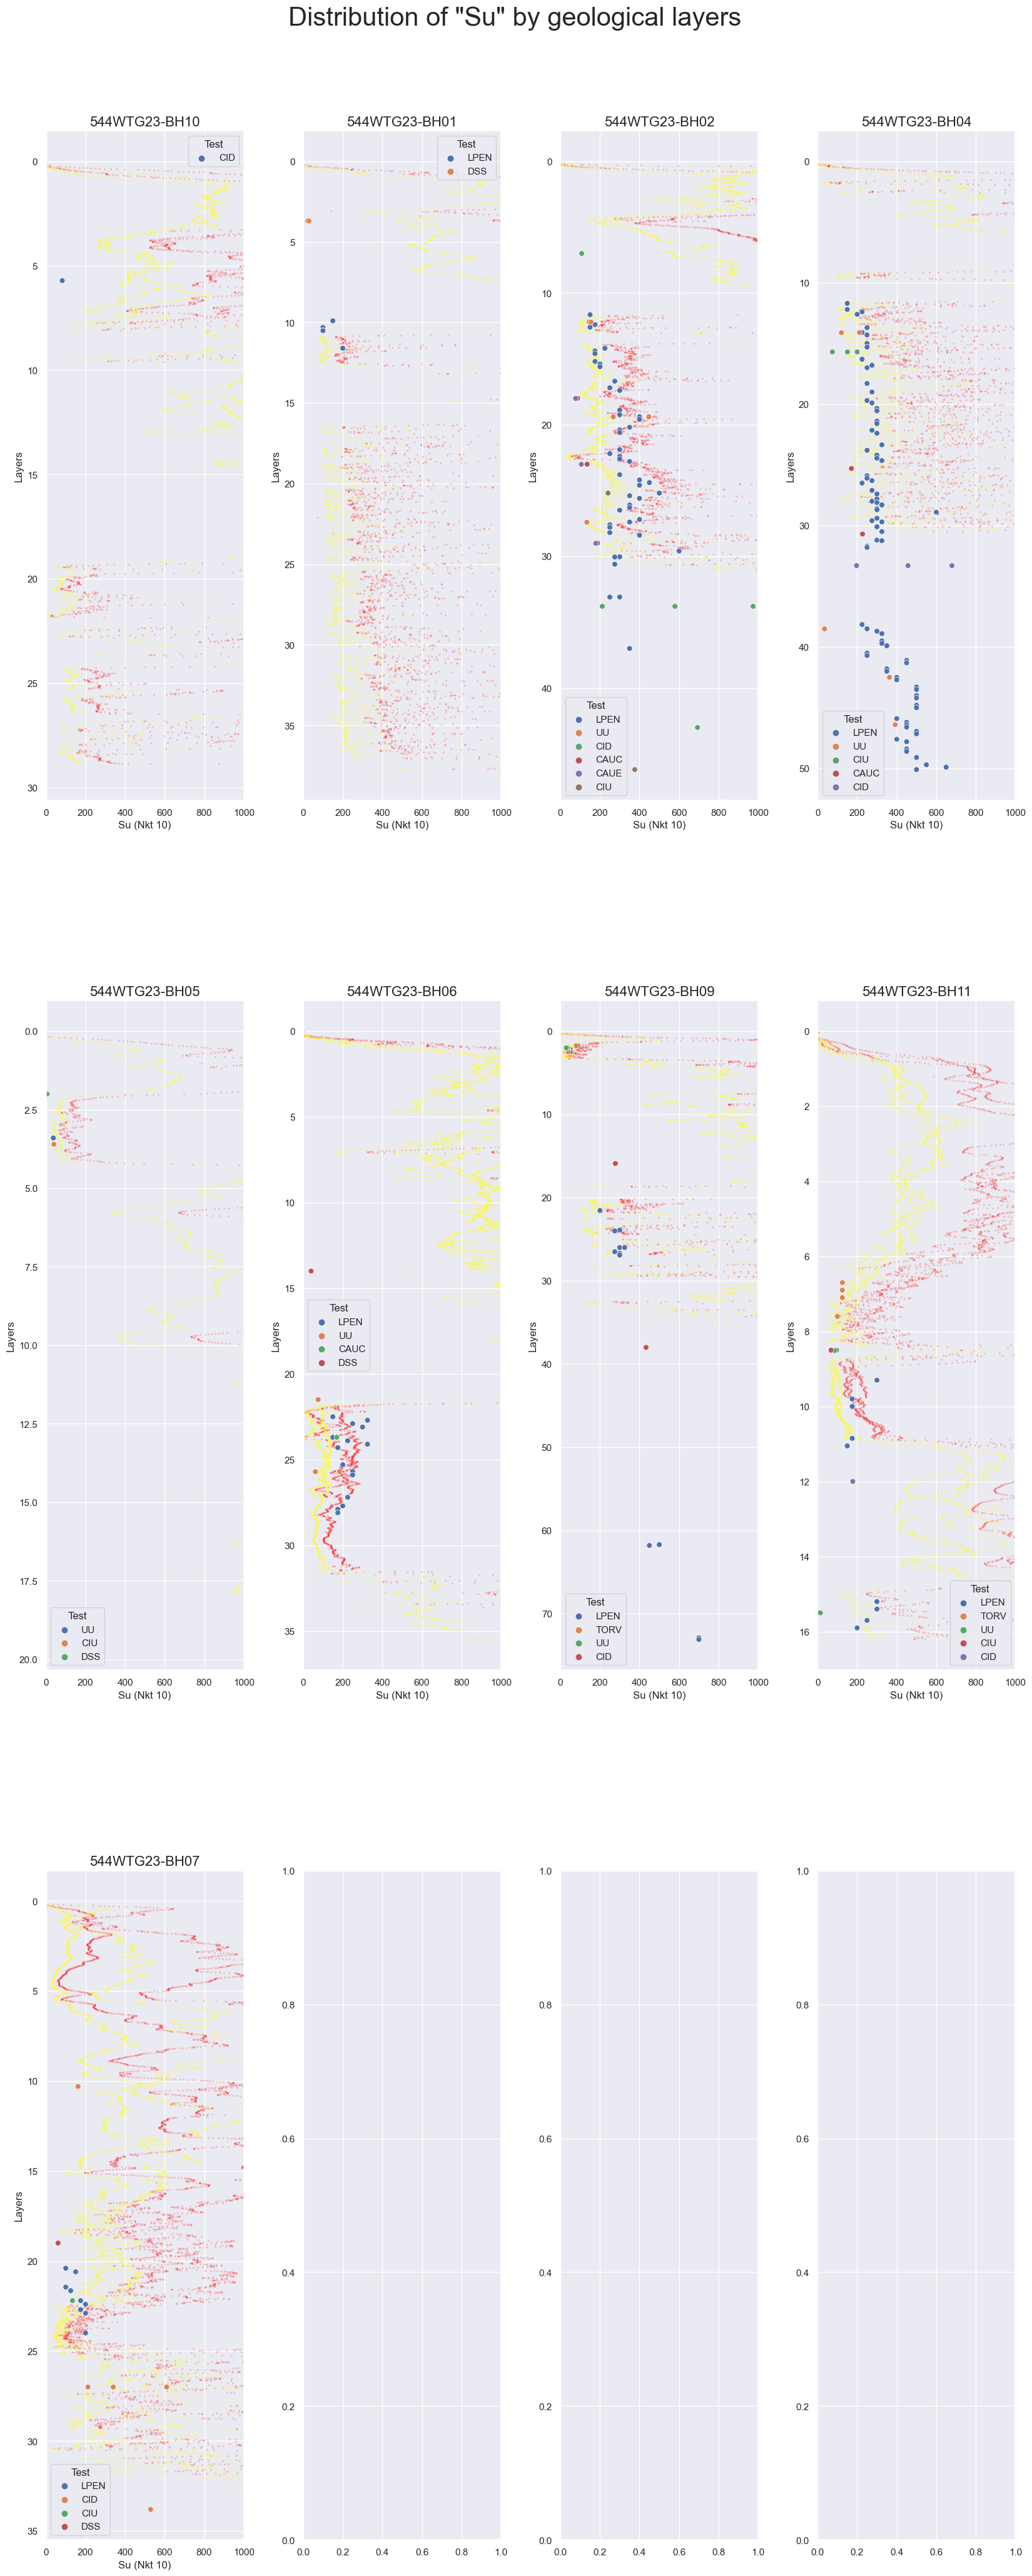

In [11]:
plot_df = cpt_df
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(3, 4)
fig.suptitle(f'Distribution of "Su" by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 50)})
sns.set(font_scale=1) 
for row in range(3):
    for col in range(4):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.2, ax=axes[row, col], s=5, color="red")
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.2, ax=axes[row, col], s=5, color="yellow")
            ax = sns.scatterplot(data=fsu_df, x="Su", y="Depth", hue="Test", alpha=1, ax=axes[row, col], s=40)
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Layers")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            bh += 1

# Average values to declutter

In [12]:
# Create dictionary with depth for each BH
cpt_depth = {}
for bh in cpt_df["PointID"].unique():
    filtered_df = cpt_df[cpt_df["PointID"] == bh]
    bottom_depth = filtered_df["Depth (m)"].max()
    cpt_depth[bh] = bottom_depth

# Put mean Su data into list
su_mean_data = []
for bh in cpt_df["PointID"].unique():
    depth_list = [i/10 for i in range(0, int(cpt_depth[bh])*10, int(0.1*10))]
    bh_df = cpt_df[cpt_df["PointID"] == bh]
    for z in depth_list:
        unit_df = bh_df[(bh_df["Depth (m)"] <= z + 0.5) & (bh_df["Depth (m)"] >= z - 0.5)]
        mean_su = unit_df[["Su", "Su (Nkt 10)", "Su (Nkt 20)"]].mean().to_list()
        su_mean_data.append([bh, z] + mean_su)

su_mean = pd.DataFrame(su_mean_data, columns=["PointID", "Depth (m)", "Su", "Su (Nkt 10)", "Su (Nkt 20)"])
su_mean

PointID  Depth (m)           Su  Su (Nkt 10)  Su (Nkt 20)
0     544WTG23-BH10        0.0    73.577157   103.008020    51.504010
1     544WTG23-BH10        0.1   125.849653   176.189514    88.094757
2     544WTG23-BH10        0.2   179.586378   251.420929   125.710464
3     544WTG23-BH10        0.3   240.629577   336.881408   168.440704
4     544WTG23-BH10        0.4   304.448202   426.227483   213.113742
...             ...        ...          ...          ...          ...
2645  544WTG23-BH07       32.5  2019.740205  2827.636287  1413.818143
2646  544WTG23-BH07       32.6  2106.795980  2949.514372  1474.757186
2647  544WTG23-BH07       32.7  2162.135949  3026.990329  1513.495164
2648  544WTG23-BH07       32.8  2235.717203  3130.004084  1565.002042
2649  544WTG23-BH07       32.9  2288.679339  3204.151074  1602.075537

[2650 rows x 5 columns]

## Plot with all cpt data

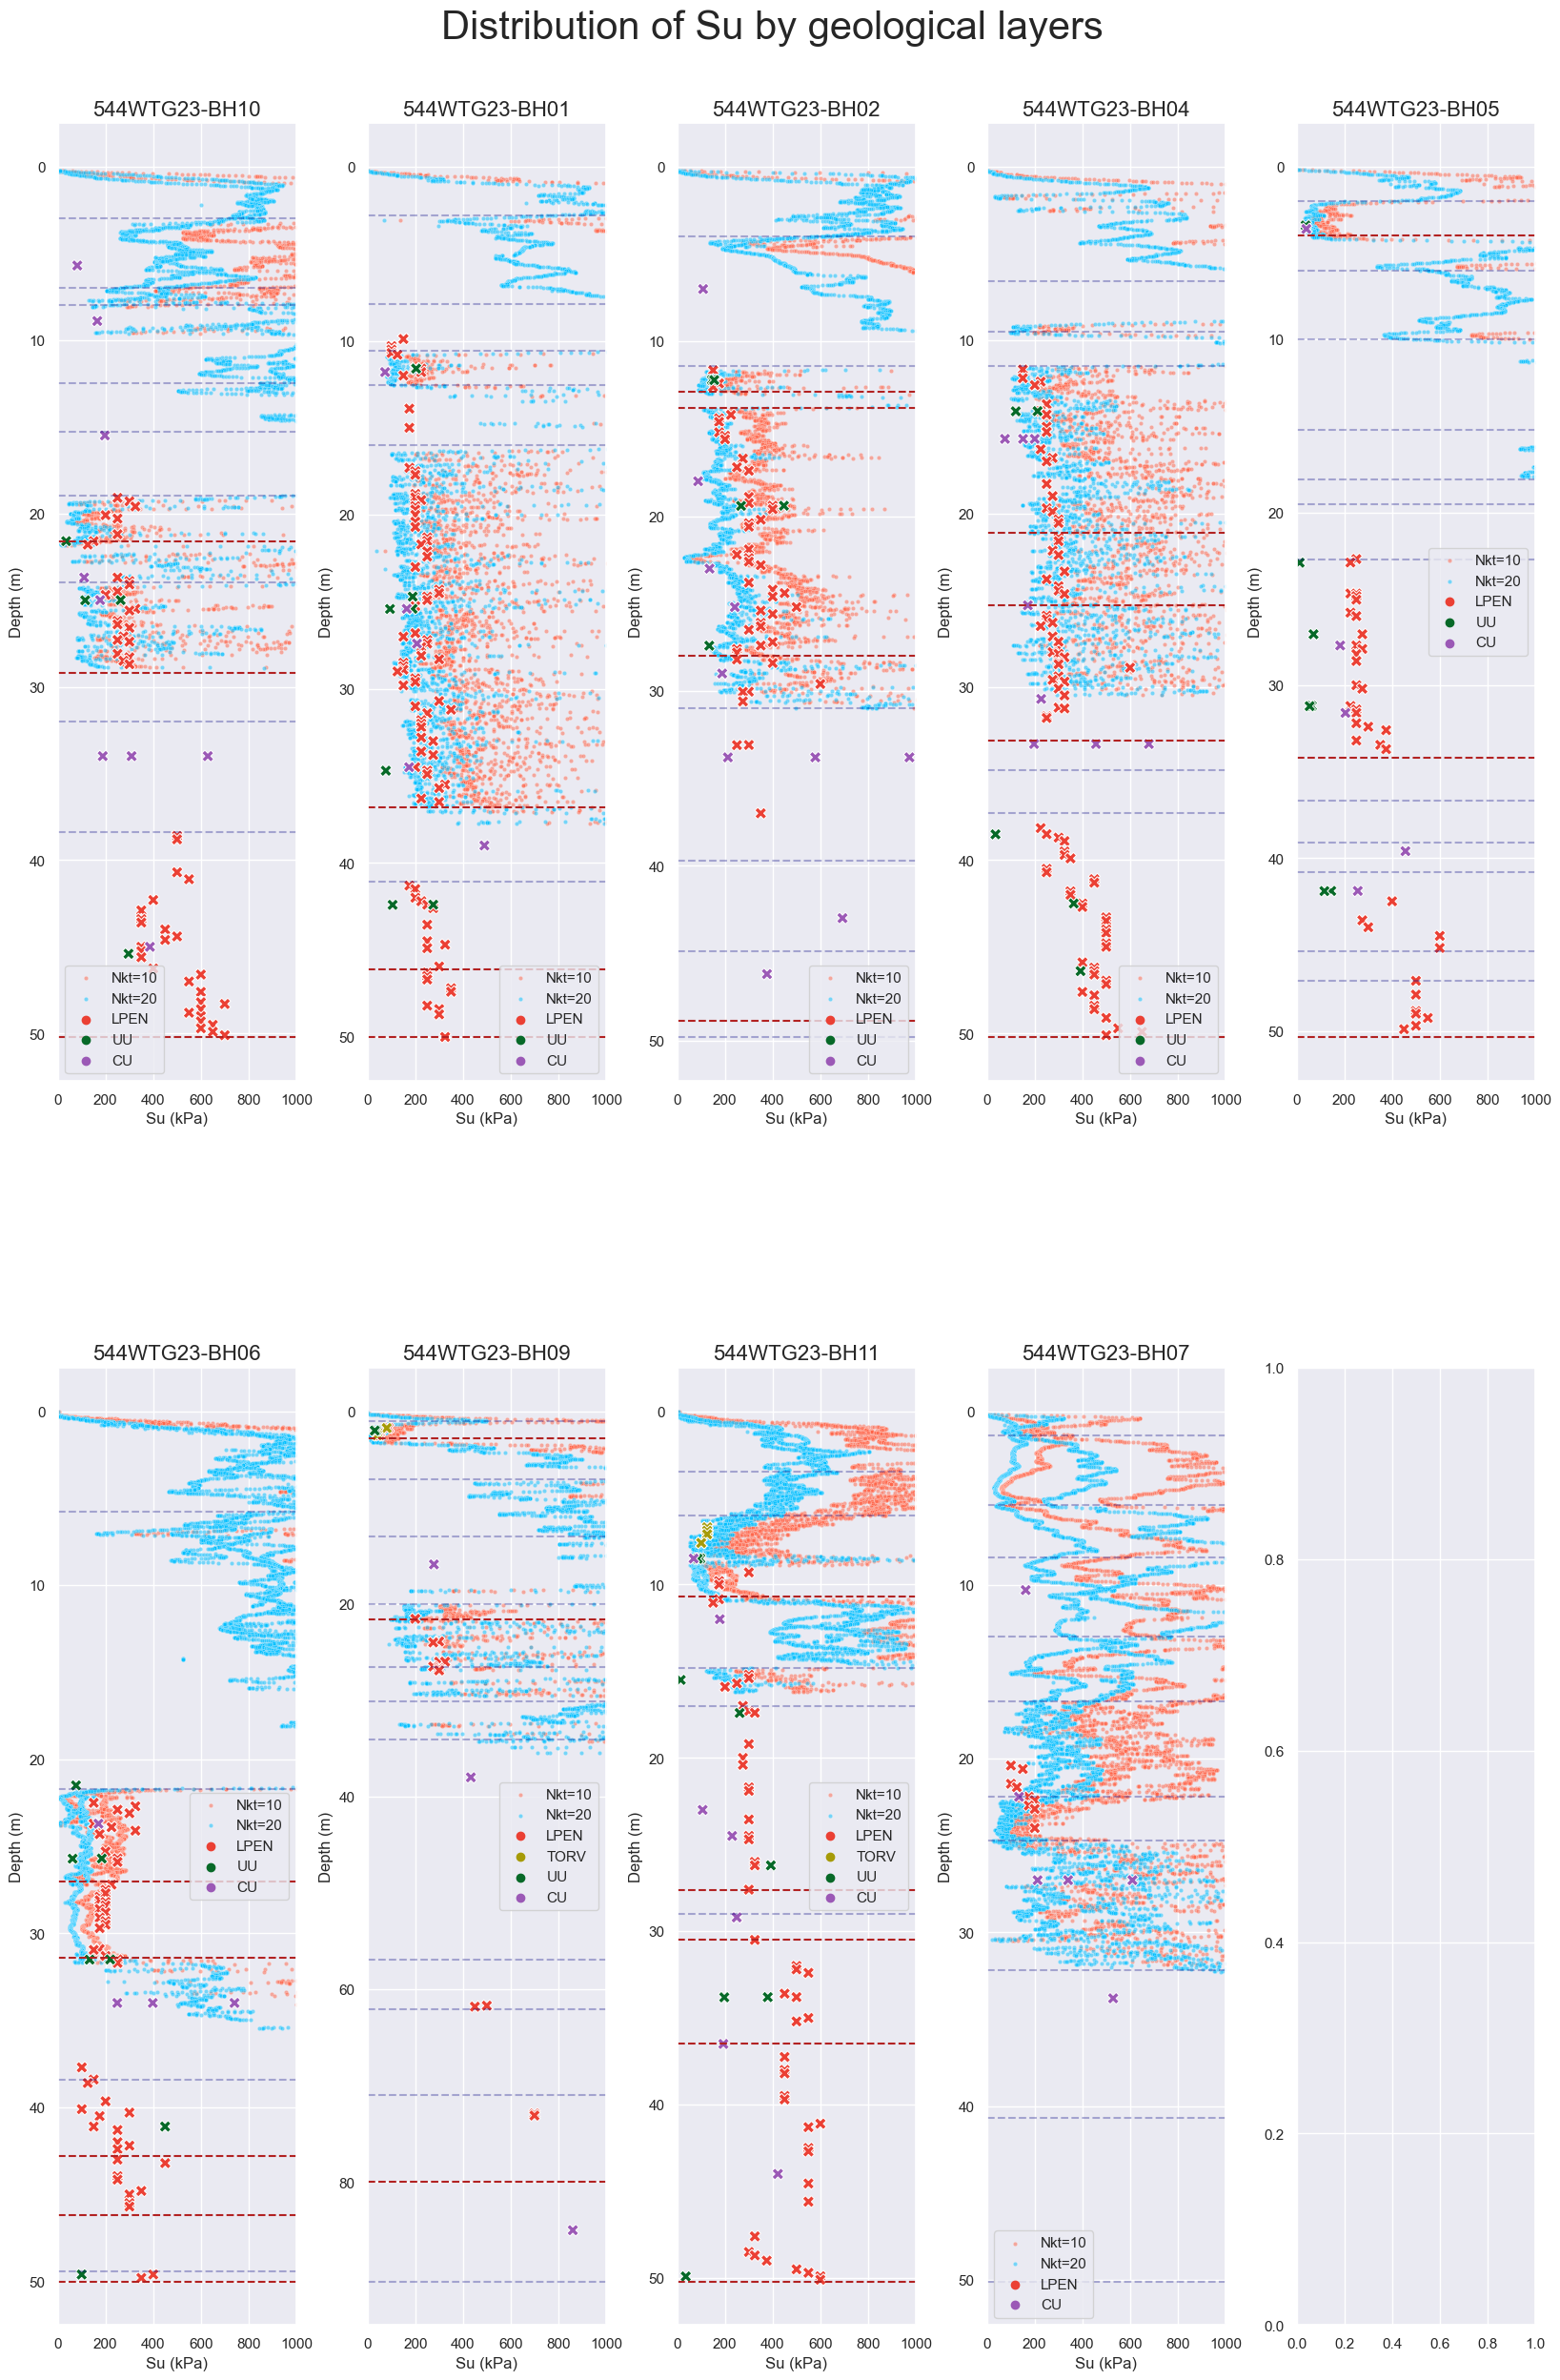

In [394]:
plot_df = cpt_df
xmin, xmax = 0, 1000
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", s=10, label="Nkt=10")
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="deepskyblue", s=10, label="Nkt=20")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Test", marker="X", alpha=1, ax=axes[row, col], s=80,
                                 palette=dict(CU="#9b59b6", UU="#076928", LPEN="#eb4034", TORV="#a69b08"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z, geol in zip(bh_geo["Depth"].to_list(), bh_geo["Soil type"].to_list()):
                if geol == "01-CLAY" or geol == "02-SILT":
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=1, color="firebrick", linestyle='dashed')
                else:
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1

## Plot with reduced data points

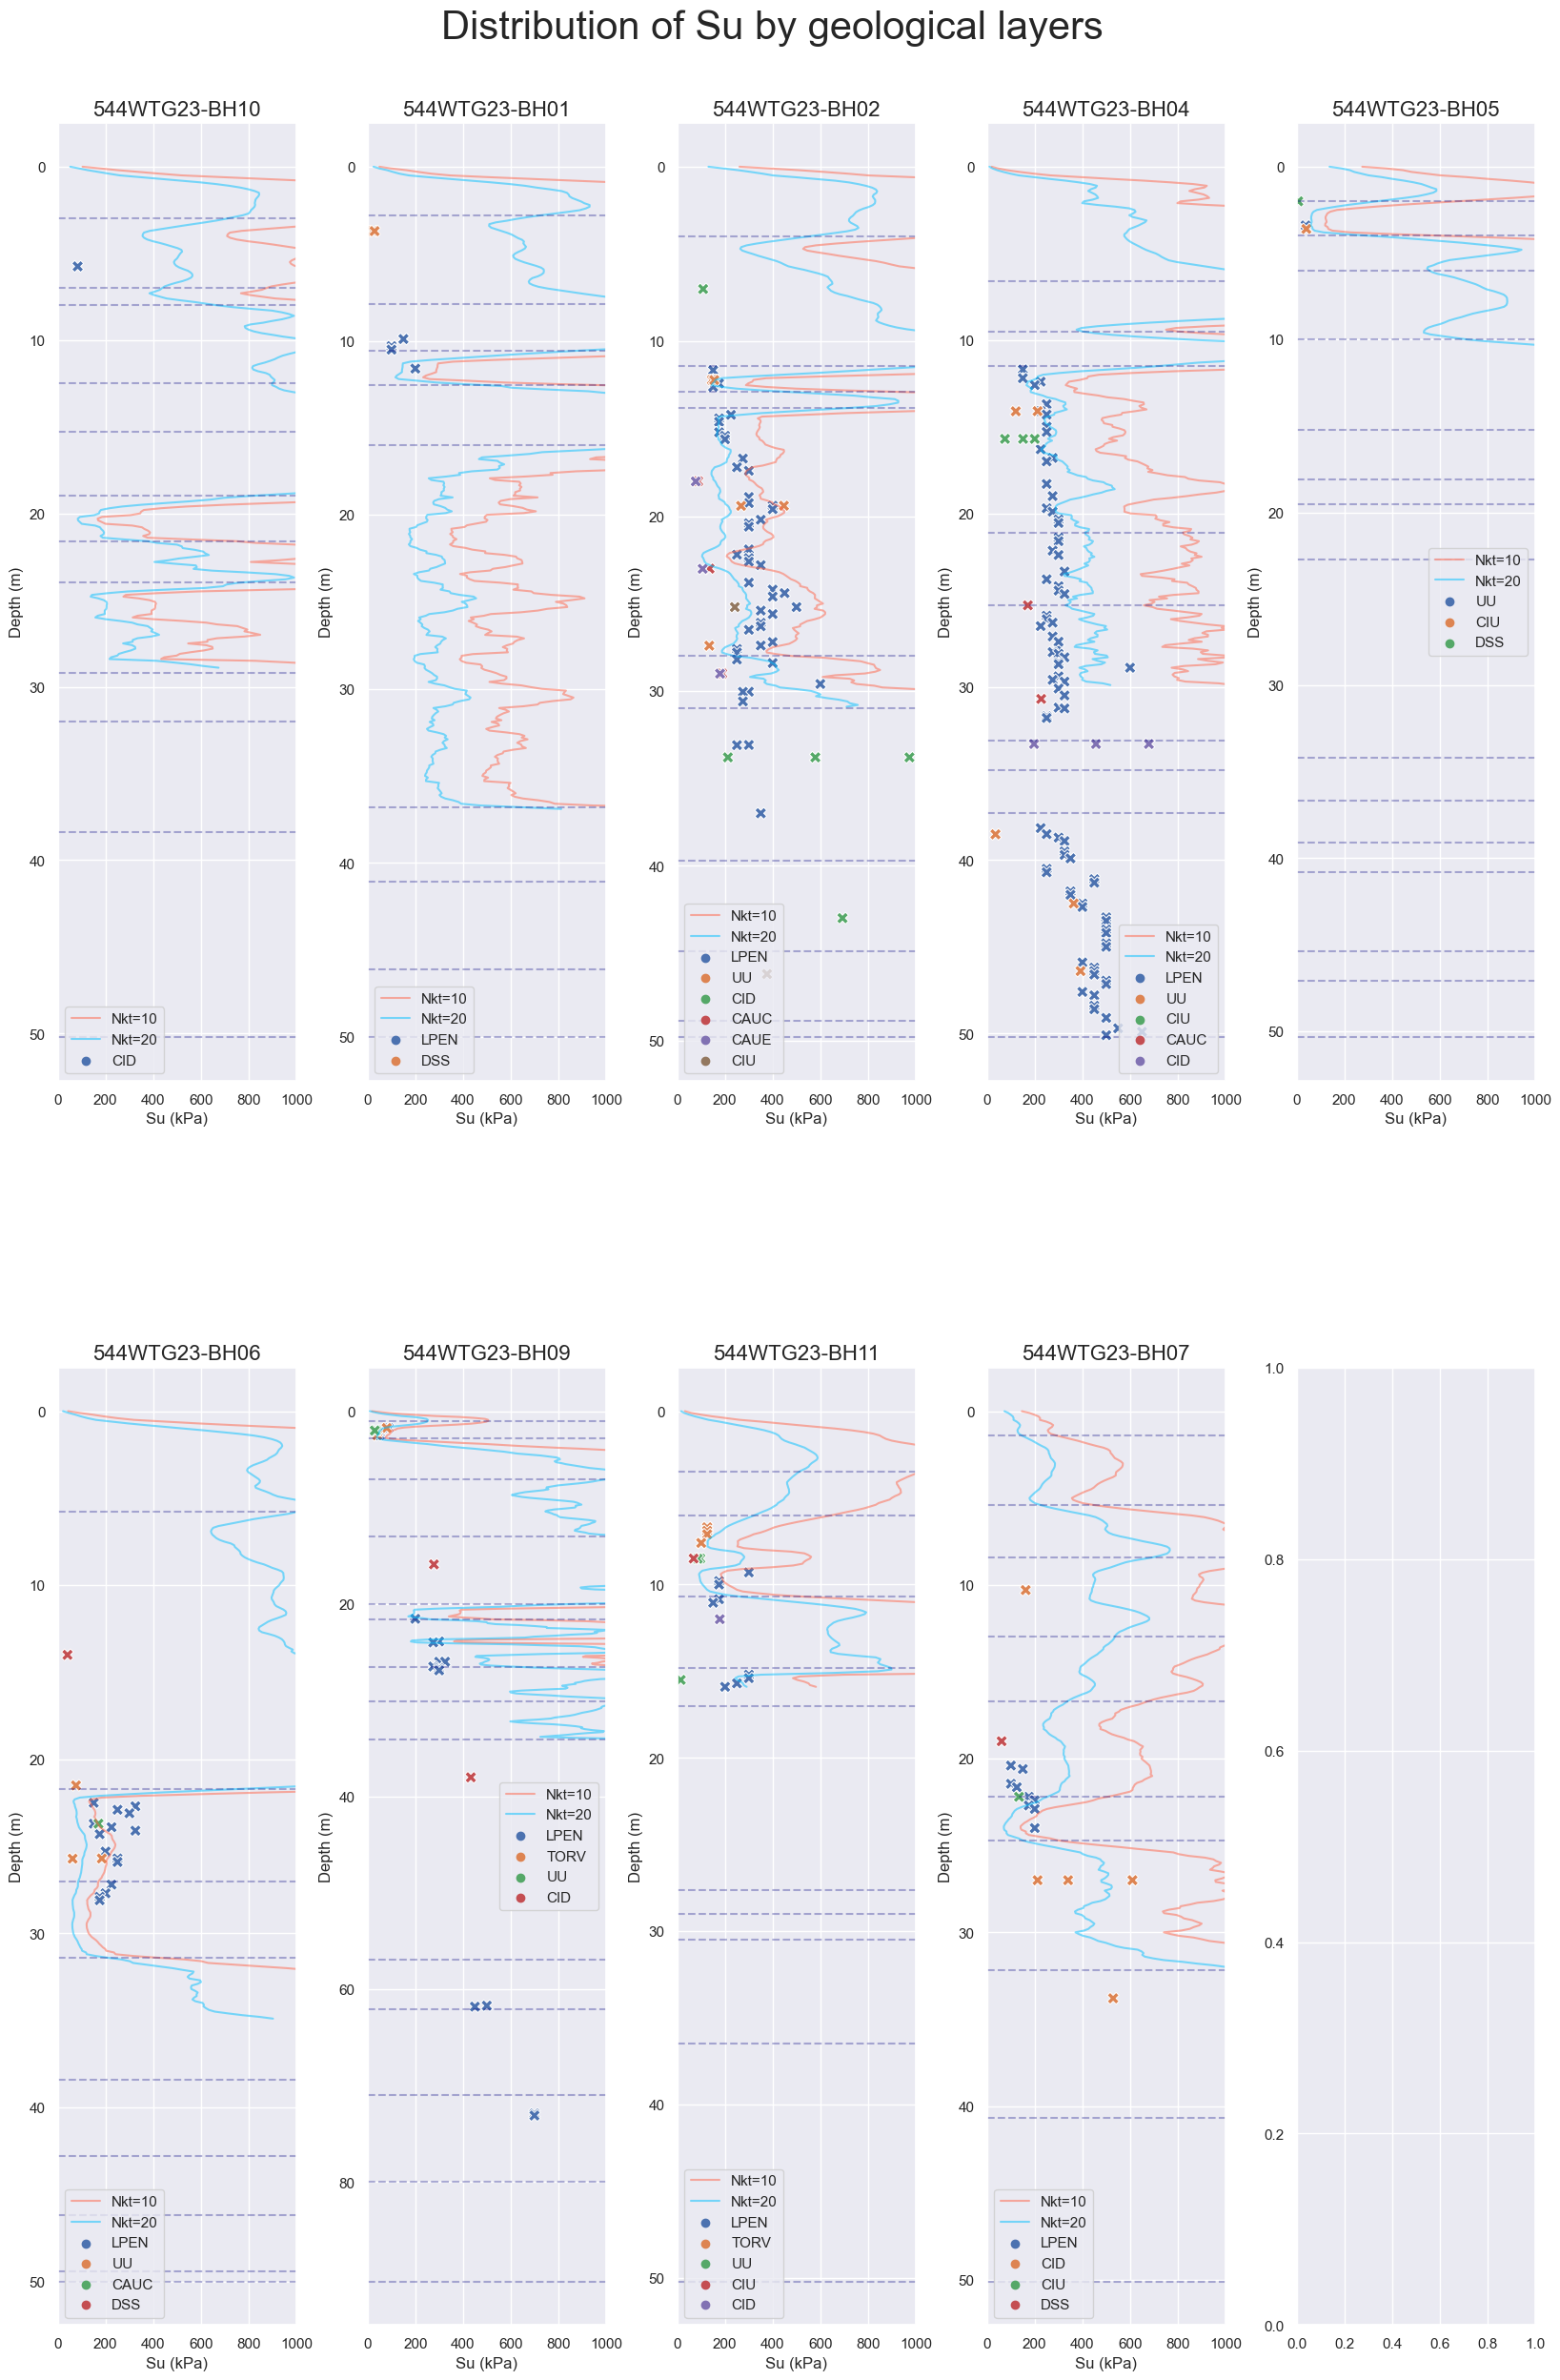

In [15]:
plot_df = su_mean
xmin, xmax = 0, 1000
parameter = "Su"
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.lineplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", orient="y", label="Nkt=10")
            ax = sns.lineplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="deepskyblue", orient="y", label="Nkt=20")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Test", marker="X", alpha=1, ax=axes[row, col], s=80)
            #ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Test", marker="X", alpha=1, ax=axes[row, col], s=80,
               #                  palette=dict(CU="#9b59b6", UU="#076928", LPEN="#eb4034", TORV="#a69b08"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1

## Derive Nkt

In [17]:
def find_Nkt(cpt_df, bh, depth, cpt_su):
    df = cpt_df[cpt_df["PointID"] == bh]
    df = df[(df["Depth (m)"] < depth + 0.1) & (df["Depth (m)"] > depth - 0.1)]
    Nkt = (df["qnet (kPa)"].mean() - df["σv (kPa)"].mean()) / cpt_su 
    return Nkt

In [18]:
su_df["Derived Nkt"] = su_df.apply(lambda x: find_Nkt(cpt_df, x.PointID, x.Depth, x.Su), axis=1, result_type="expand")
# su_df["Nkt check"] = su_df["Derived Nkt"].apply(lambda x: "In" if (x <= 20 and x > 10) else ("Mid" if (x < 25 and x > 10) else "Out"))
su_df["Nkt check"] = su_df["Derived Nkt"].apply(lambda x: "In" if (x <= 20 and x > 10) else "Out")
su_df

PointID  Depth     Su  Test  Derived Nkt Nkt check
0     544WTG23-BH01   9.89  150.0  LPEN   273.468222       Out
1     544WTG23-BH01   9.90  150.0  LPEN   267.578932       Out
2     544WTG23-BH01  10.30  100.0  LPEN   263.203577       Out
3     544WTG23-BH01  10.31  100.0  LPEN   263.327399       Out
4     544WTG23-BH01  10.50  100.0  LPEN   261.939478       Out
..              ...    ...    ...   ...          ...       ...
603   544WTG23-BH01   3.70   29.0   DSS   365.172155       Out
604  544WTG23-BH03a  18.50   32.0   DSS          NaN       Out
605   544WTG23-BH05   2.00    6.0   DSS  1085.113184       Out
606   544WTG23-BH06  14.00   40.0   DSS   525.556086       Out
607   544WTG23-BH07  19.00   61.0   DSS   113.328957       Out

[608 rows x 6 columns]

<Axes: xlabel='Derived Nkt', ylabel='Test'>

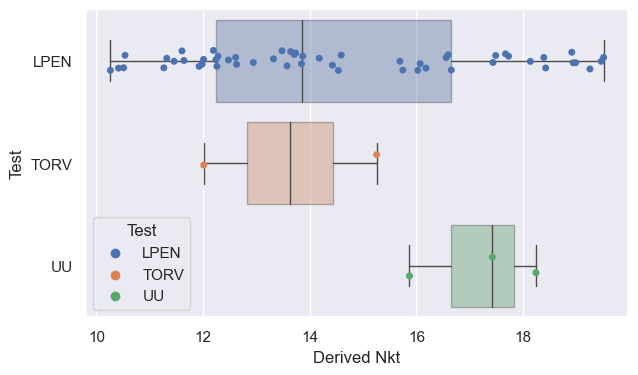

In [19]:
plot_df = su_df[su_df["Nkt check"] == "In"]
sns.set(rc={"figure.figsize":(7, 4)})
sns.boxplot(data=plot_df, x="Derived Nkt", y="Test", boxprops=dict(alpha=.4), linewidth=1, showfliers= False)
sns.stripplot(data=plot_df, x="Derived Nkt", y="Test", orient="h", hue="Test")

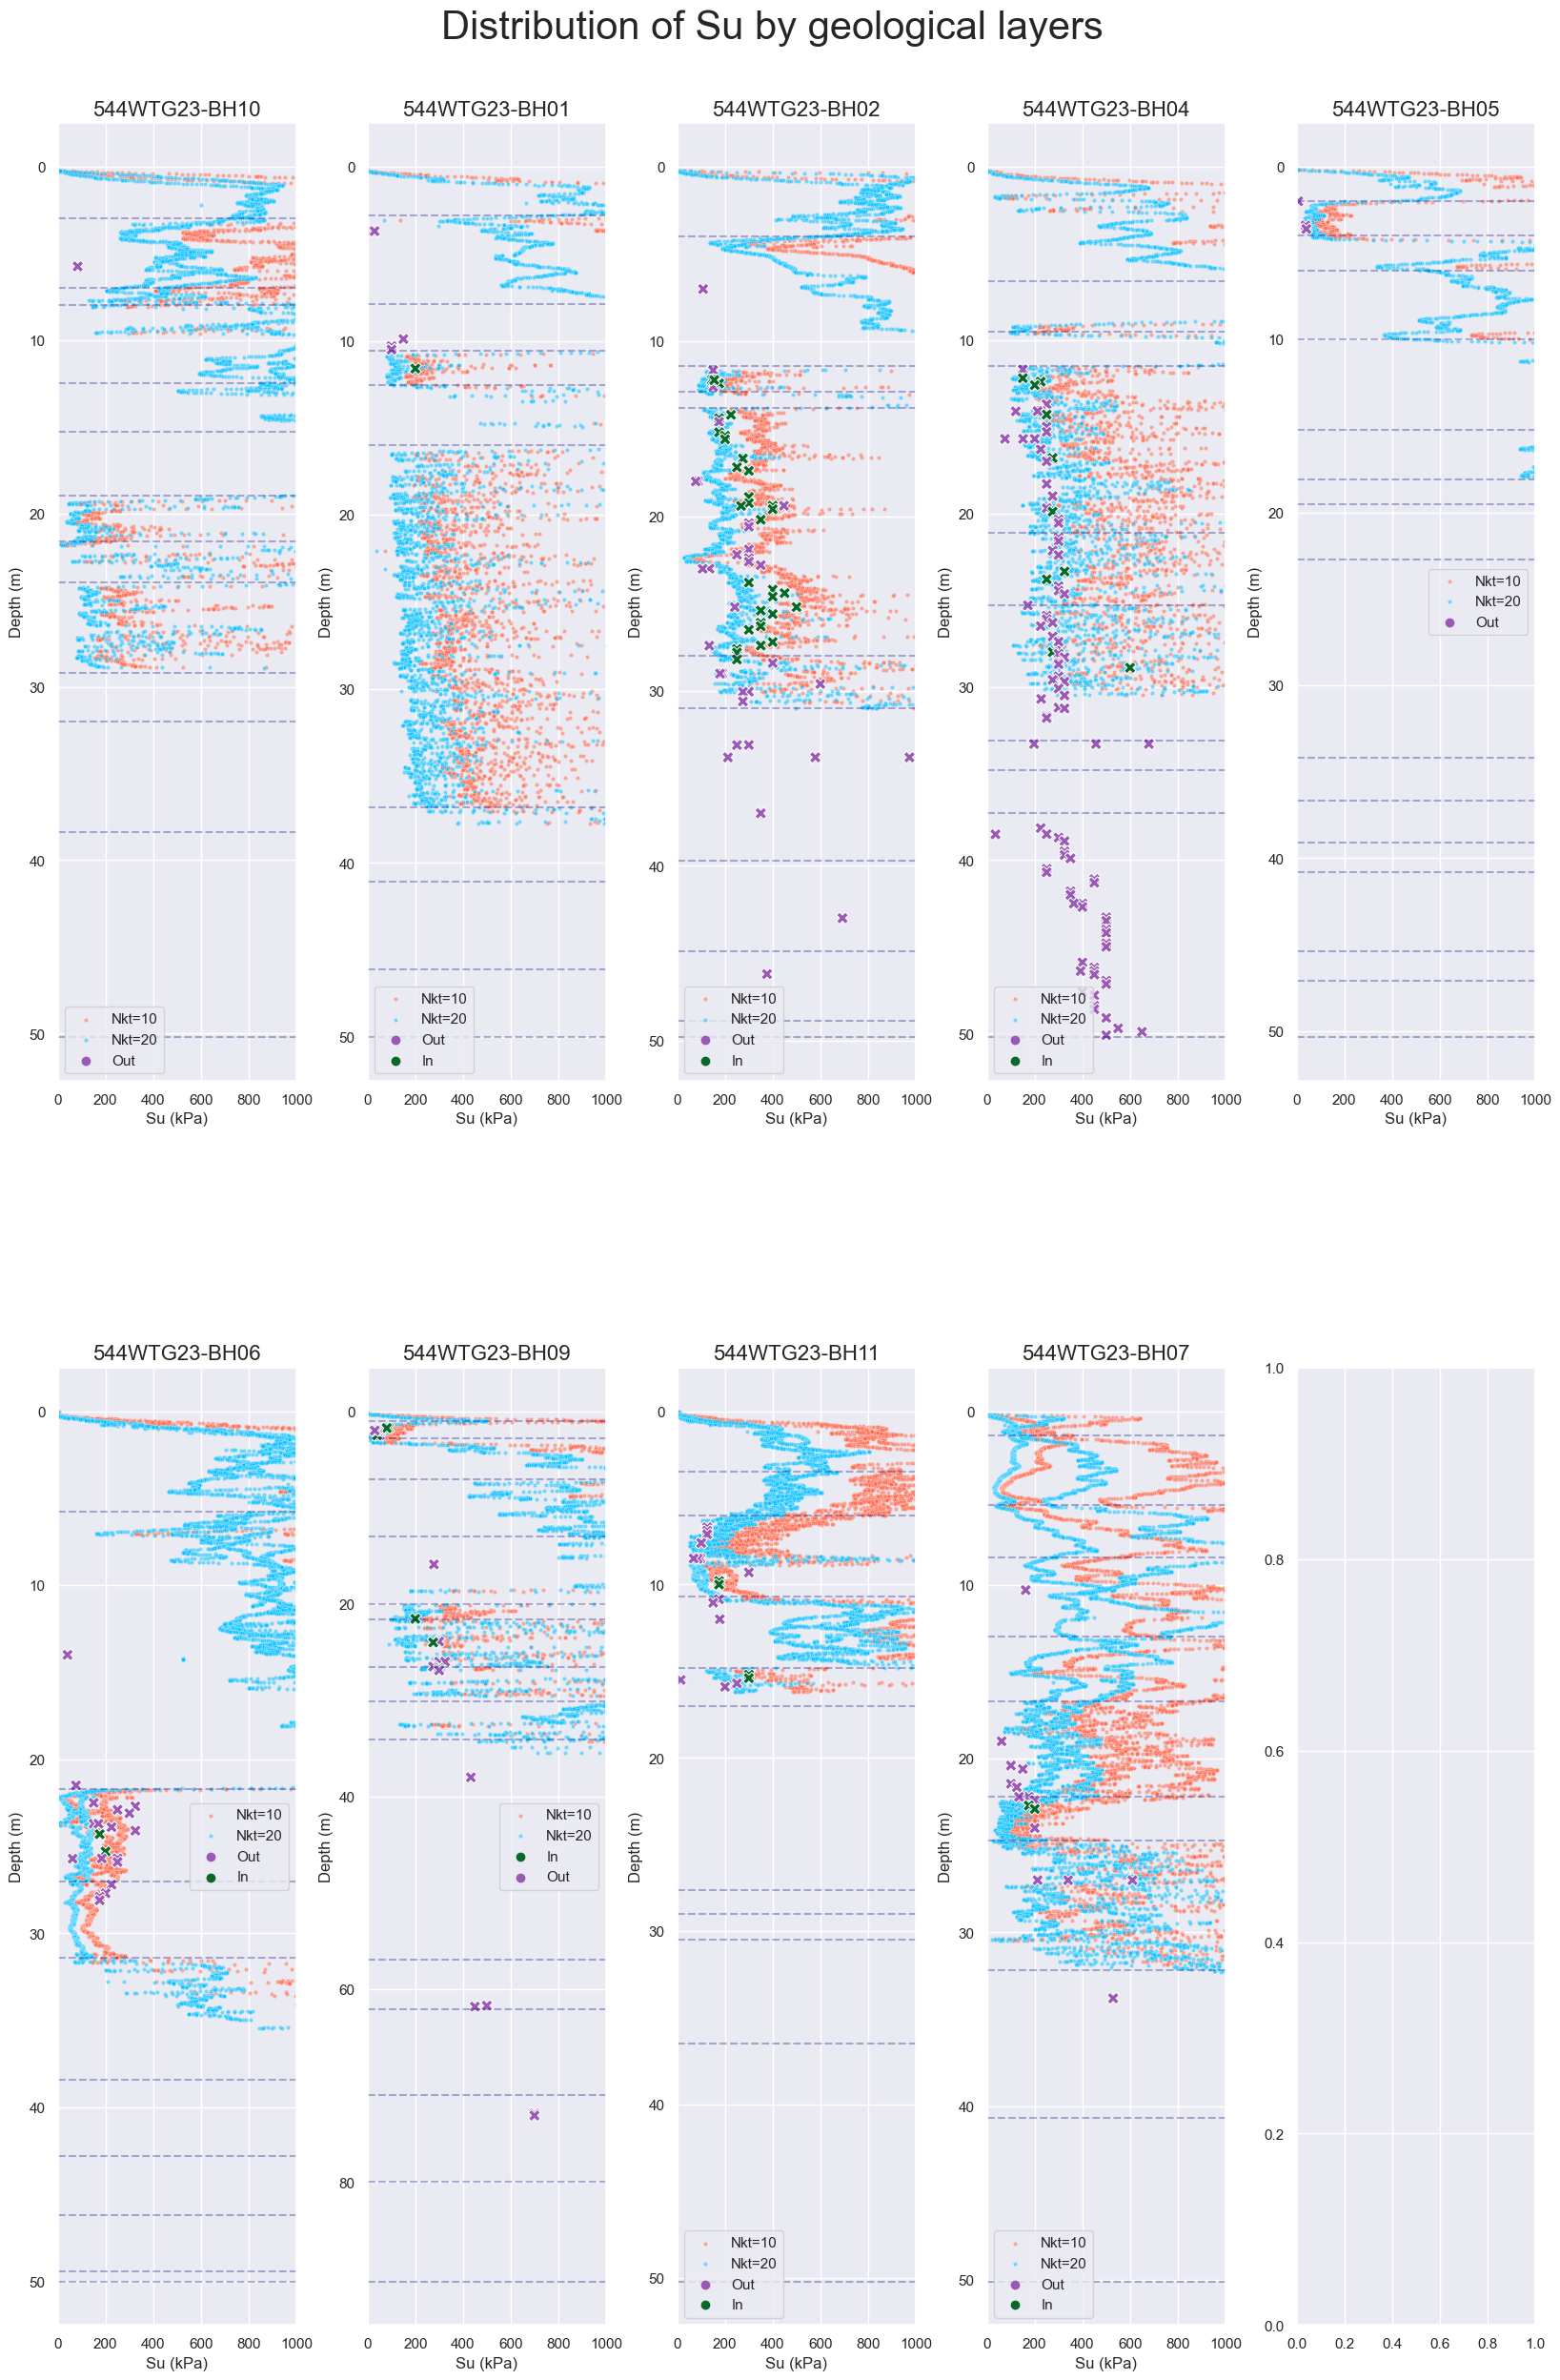

In [22]:
plot_df = cpt_df
xmin, xmax = 0, 1000
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", s=10, label="Nkt=10")
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="deepskyblue", s=10, label="Nkt=20")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Nkt check", marker="X", alpha=1, ax=axes[row, col], s=80,
                                palette=dict(Out="#9b59b6", In="#076928", Mid="#f20000"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1

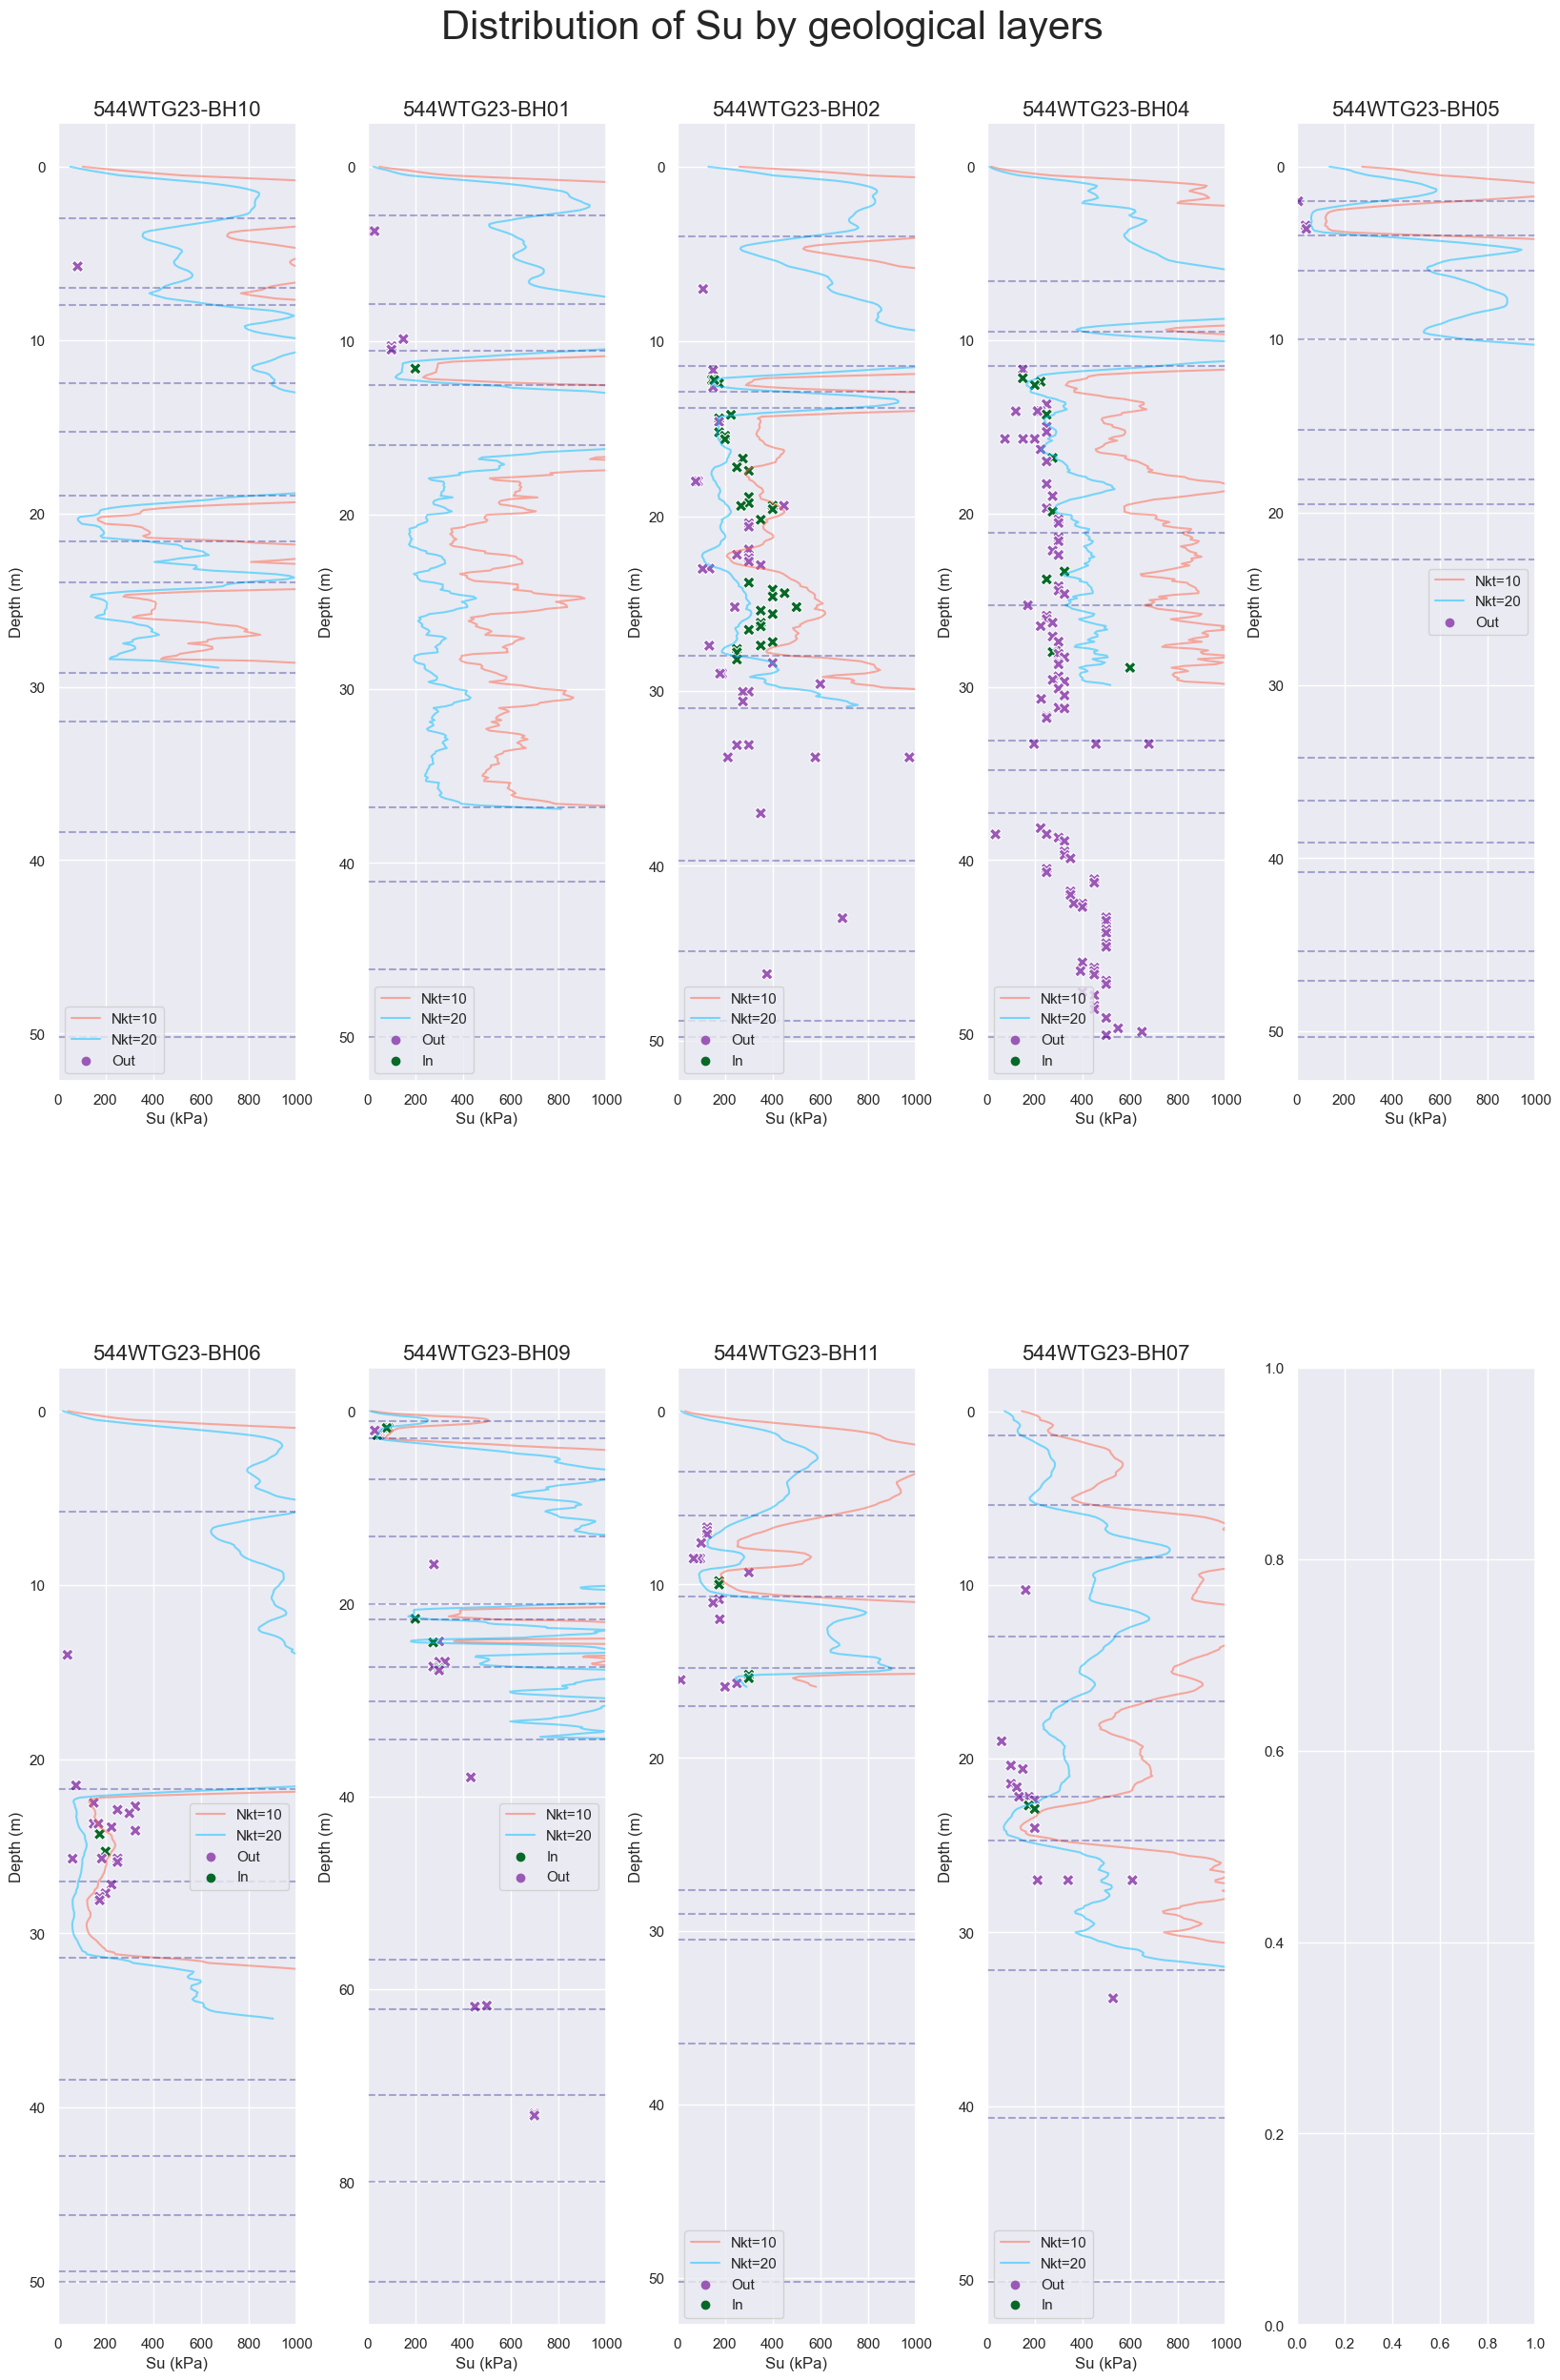

In [23]:
plot_df = su_mean
xmin, xmax = 0, 1000
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.lineplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", orient="y", label="Nkt=10")
            ax = sns.lineplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="deepskyblue", orient="y", label="Nkt=20")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Nkt check", marker="X", alpha=1, ax=axes[row, col], s=80,
                                palette=dict(Out="#9b59b6", In="#076928", Mid="#f20000"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1

## Nkt statistics

Mean = 14.66
Median = 14.02


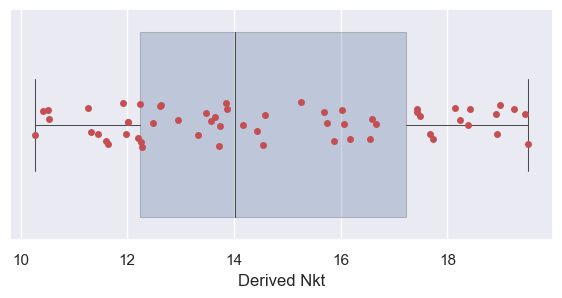

In [24]:
print("Mean =", round(su_df[su_df["Nkt check"] == "In"]["Derived Nkt"].mean(), 2))
print("Median =", round(su_df[su_df["Nkt check"] == "In"]["Derived Nkt"].median(), 2))
under25_df = su_df[su_df["Nkt check"] == "In"]
sns.set(rc={"figure.figsize":(7, 3)})
sns.stripplot(data=under25_df, x="Derived Nkt", c="r")
sns.boxplot(data=under25_df, x="Derived Nkt", boxprops=dict(alpha=.3), linewidth=.75, showfliers= False)
# Seet value
derived_Nkt = su_df[su_df["Nkt check"] == "In"]["Derived Nkt"].mean()
cpt_df["Su (Nkt derived)"] =  (cpt_df["qnet (kPa)"] - cpt_df["σv (kPa)"]) / derived_Nkt

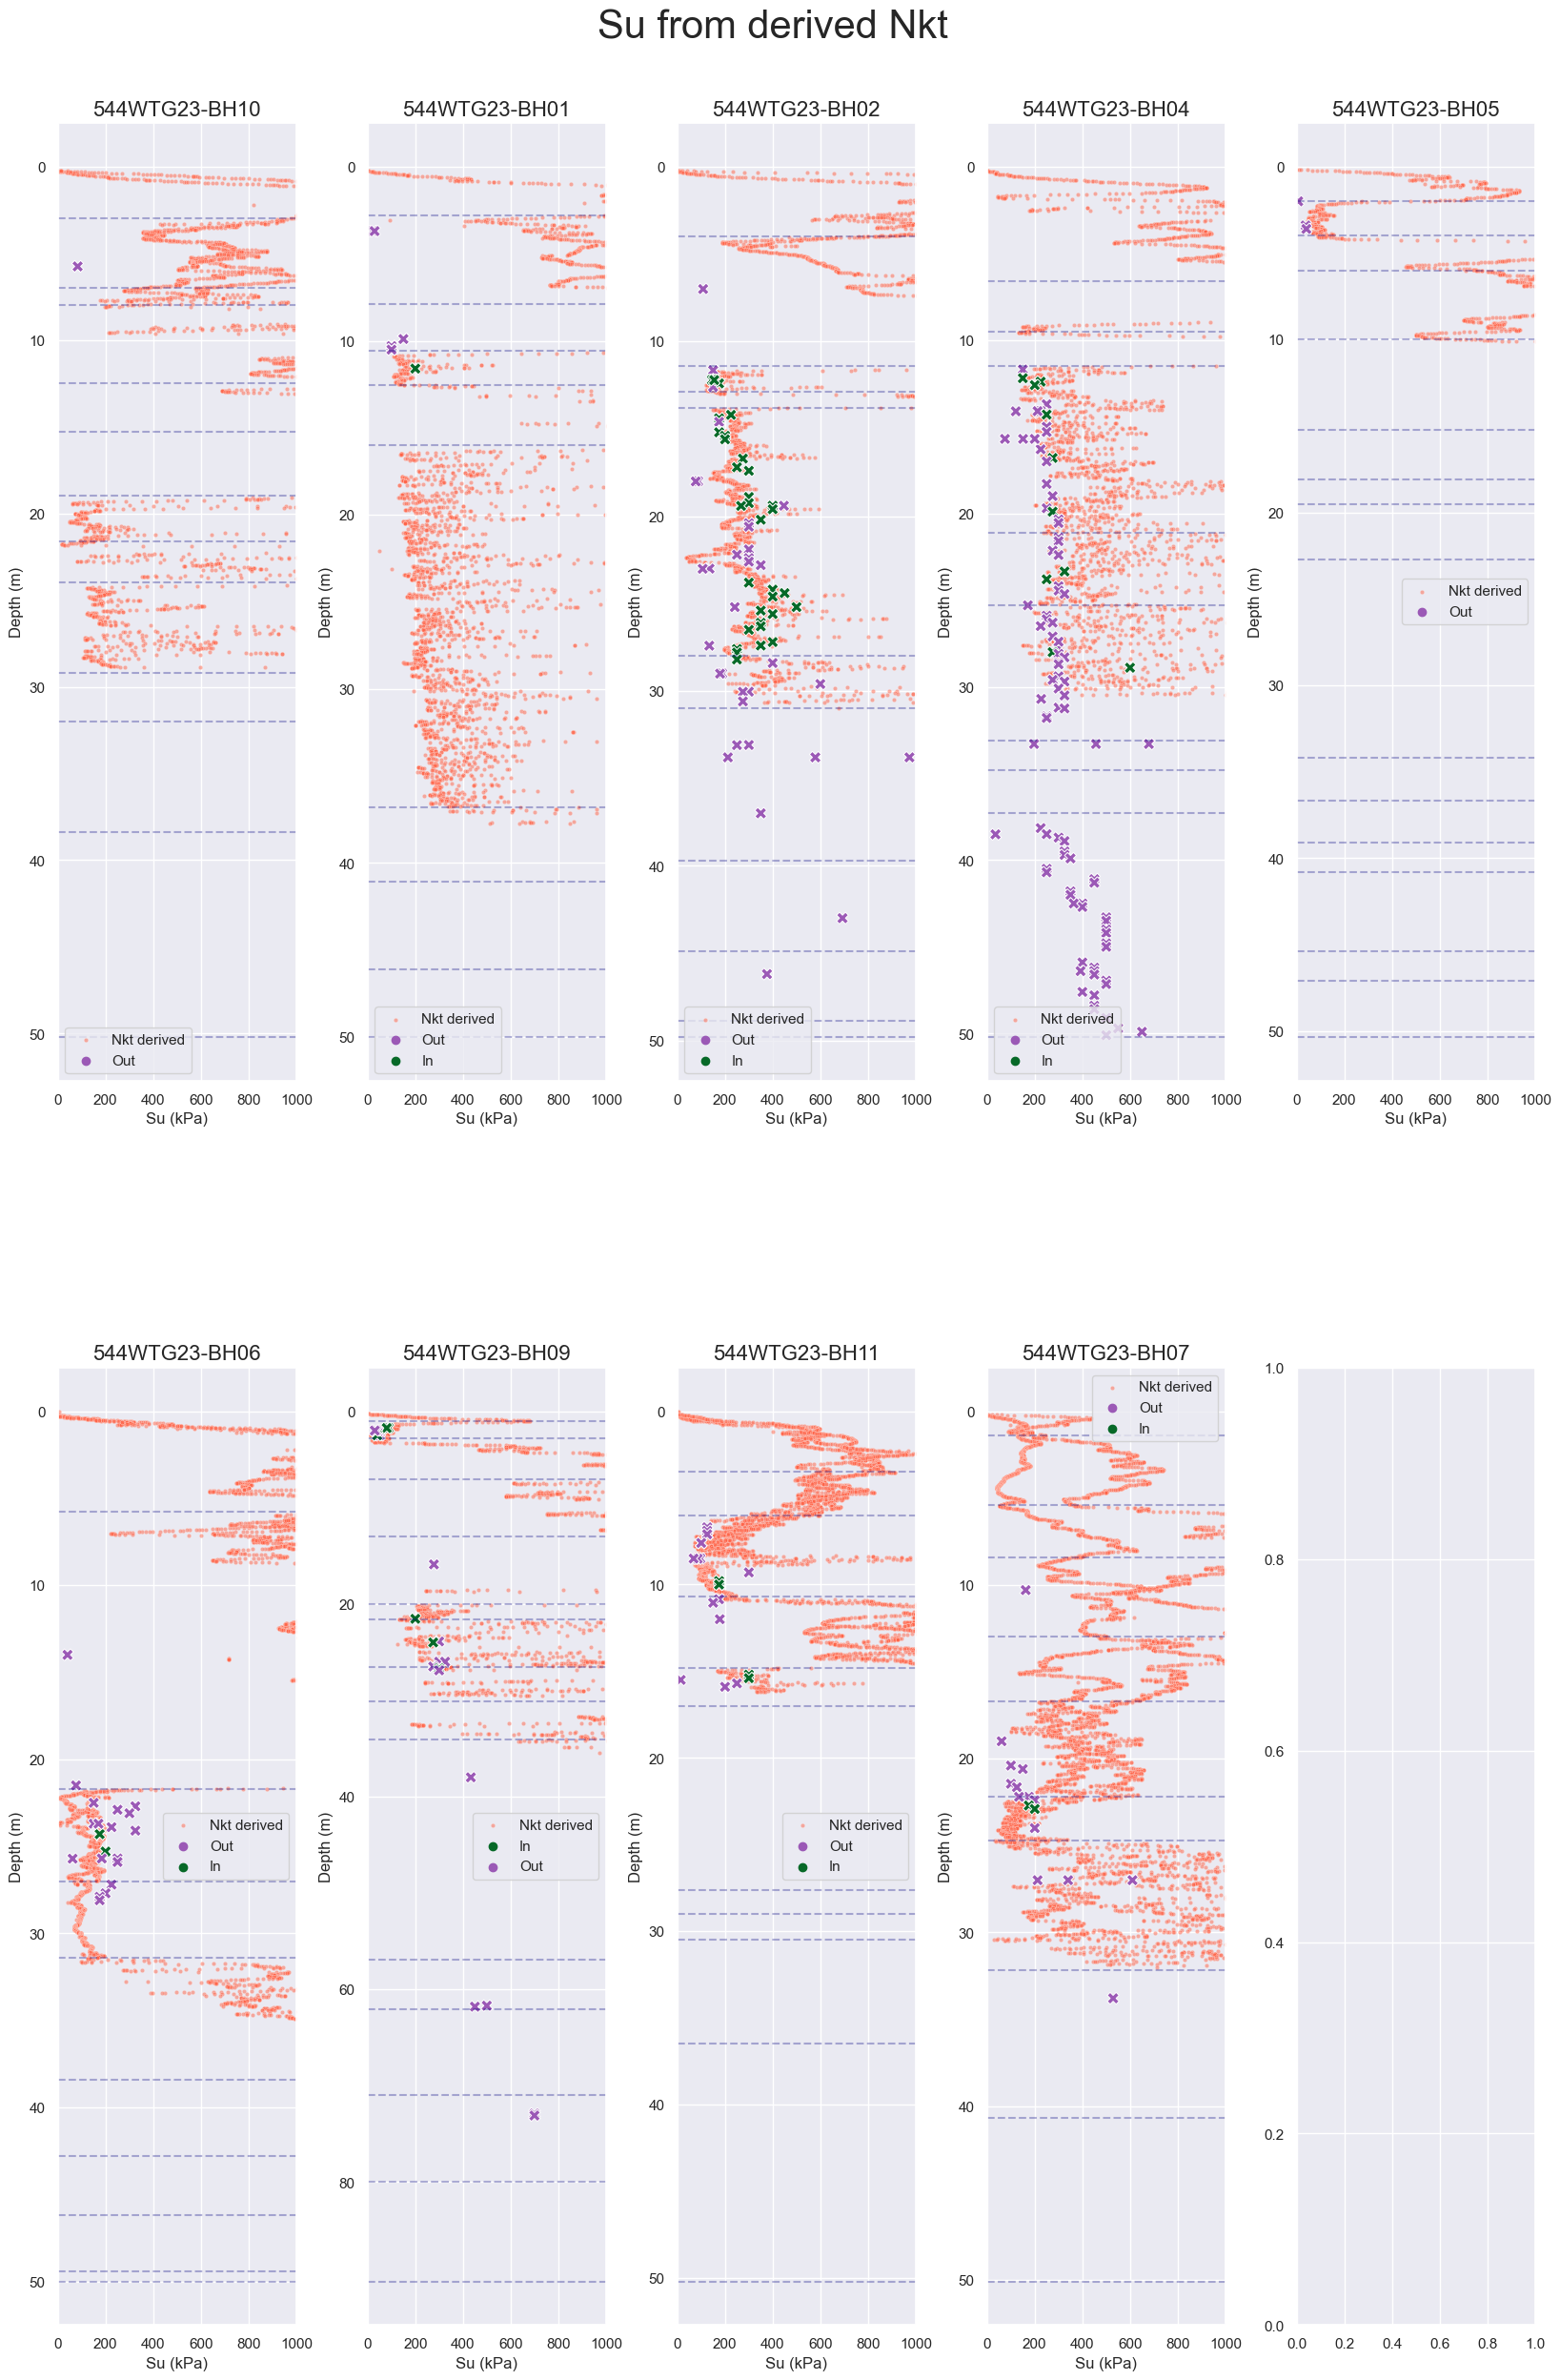

In [26]:
plot_df = cpt_df
xmin, xmax = 0, 1000
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f"Su from derived Nkt", size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt derived)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", s=10, label="Nkt derived")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Nkt check", marker="X", alpha=1, ax=axes[row, col], s=80,
                                palette=dict(Out="#9b59b6", In="#076928", Mid="#f20000"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1